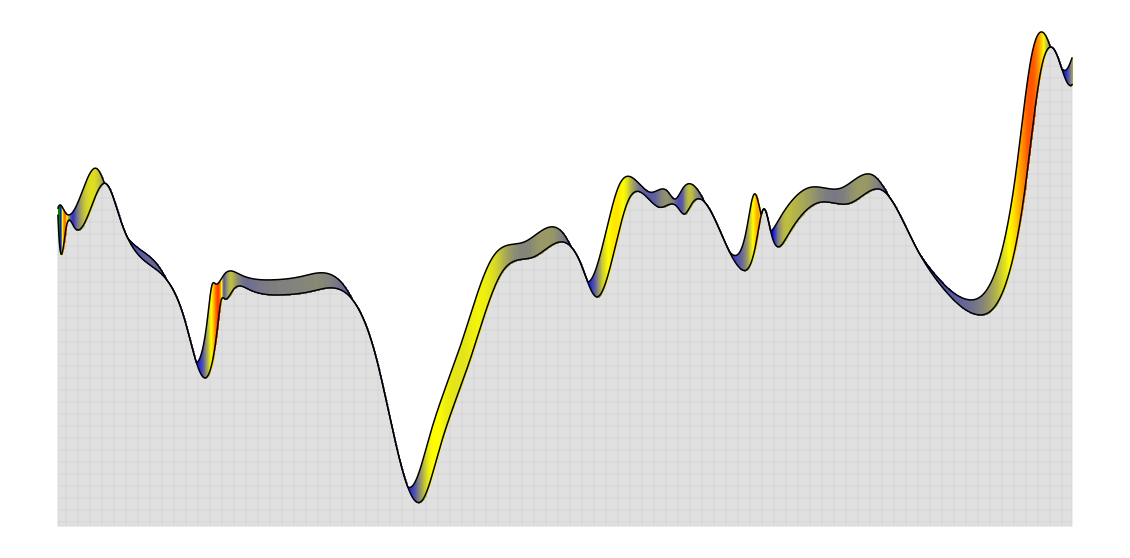

In [11]:
from scipy.interpolate import UnivariateSpline
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from matplotlib.colors import Normalize,LinearSegmentedColormap
from matplotlib.patches import Rectangle

tree = ET.parse("./test.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

spl = UnivariateSpline(x,y,s=len(all_altitudes)*50)
splined_y = spl(x)

offset = 15
offset_y = shift(splined_y,-offset*1.3,mode='reflect') + offset

for index,(normal,offset) in enumerate(zip(splined_y,offset_y)):
    if offset < normal:
        offset_y[index] = splined_y[index]

gradient = np.gradient(splined_y)
norm = Normalize(vmin=-5,vmax=5)
colors = ['green','blue','yellow','red']
my_map = LinearSegmentedColormap.from_list('greenred',colors)
cmap = plt.get_cmap("terrain")
cols = my_map(norm(gradient))

fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111) 

ax.plot(x,splined_y,'black')
ax.plot(x,offset_y,'black')
ax.fill_between(x,plt.gca().get_ylim()[0],splined_y,color='lightgrey',alpha=0.7,hatch="+")

for k,i in enumerate(x):
    lower_left = (x[k],splined_y[k])
    width = 1
    height = offset_y[k]-splined_y[k]
    rect = Rectangle(lower_left,width,height,color=cols[k])
    ax.add_patch(rect)

plt.axis('off')
plt.show()   